In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.multiclass import OutputCodeClassifier


In [2]:
df = pd.read_csv(r"C:\Users\Oussou\Documents\Rachid Ousmane\cours auto\ODC_AI\svm\Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Importation de données

In [4]:
# iris = datasets.load_iris()

# # Creation du dataframe
# df = pd.DataFrame(iris.data, columns = iris.feature_names)
# df['target'] = iris.target
# df

Selection de features

C:\Users\Oussou\AppData\Local\Temp\ipykernel_11872\3757163457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


Text(0.5, 1.0, 'Correlation sur les données')

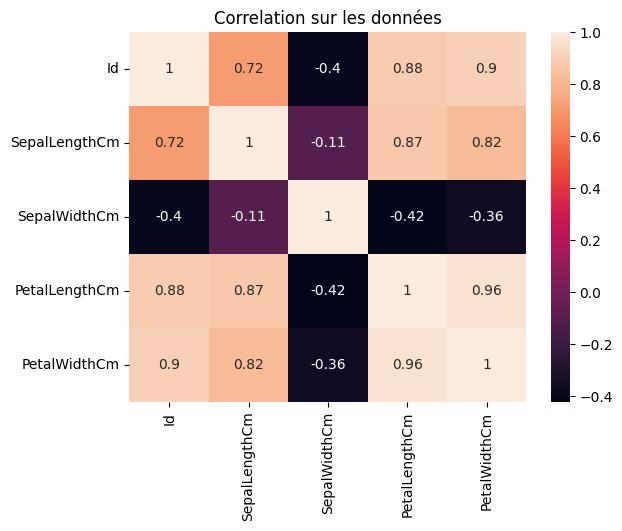

In [5]:
plt.figure(1)
sns.heatmap(df.corr(), annot= True)
plt.title('Correlation sur les données')

In [6]:
def myDummy(df, column):
    dummy_df = pd.get_dummies(df[column])
    
    dummy_df[column] = ""
    n_cat = len(df[column].unique())
    for i in range(len(dummy_df)):
        for j in range(n_cat):
            dummy_df.iloc[i, n_cat] = str(dummy_df.iloc[i, n_cat]) + str(dummy_df.iloc[i, j])
            # dummy_df.iloc[i, 3] = str(dummy_df.iloc[i, 0]) + str(dummy_df.iloc[i, 1]) + str(dummy_df.iloc[i, 2])
            # dummy_df["newTarget"]
    df = df.drop(column, axis=1)
    df = pd.concat([df, dummy_df[column]], axis=1)
    print(n_cat, "Catégories")
    return df

In [7]:
# df = myDummy(df, "Species")
# df

In [8]:
dummy_df = pd.get_dummies(df["Species"])
df = df.drop("Species", axis=1)
df = pd.concat([df, dummy_df], axis=1)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [9]:
X = np.array(df.iloc[:, 1:5 ])
y = df[["Iris-setosa","Iris-versicolor", "Iris-virginica"]]
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state =5 )
# print(Y_test)
print(Y_test)

     Iris-setosa  Iris-versicolor  Iris-virginica
82             0                1               0
134            0                0               1
114            0                0               1
42             1                0               0
109            0                0               1
57             0                1               0
1              1                0               0
70             0                1               0
25             1                0               0
84             0                1               0
66             0                1               0
133            0                0               1
102            0                0               1
107            0                0               1
26             1                0               0
23             1                0               0
123            0                0               1
130            0                0               1
21             1                0               0


In [11]:
#visualisation des données
# plt.figure(figsize=(10, 6))
# plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
# plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
# plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='r', label='2')
# plt.xlabel("Longueur (cm)")
# plt.ylabel("Largeur (cm)")
# plt.title("Les 3 catégories de fleurs d'IRIS ")
# plt.legend();

In [12]:
df.isnull().sum()

Id                 0
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Iris-setosa        0
Iris-versicolor    0
Iris-virginica     0
dtype: int64

In [13]:
df.dtypes

Id                   int64
SepalLengthCm      float64
SepalWidthCm       float64
PetalLengthCm      float64
PetalWidthCm       float64
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               150 non-null    int64  
 1   SepalLengthCm    150 non-null    float64
 2   SepalWidthCm     150 non-null    float64
 3   PetalLengthCm    150 non-null    float64
 4   PetalWidthCm     150 non-null    float64
 5   Iris-setosa      150 non-null    uint8  
 6   Iris-versicolor  150 non-null    uint8  
 7   Iris-virginica   150 non-null    uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 6.4 KB


In [16]:
pearson_coef, p_value = stats.pearsonr(df['SepalLengthCm'], df['SepalWidthCm'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.10936924995064938  with a P-value of P =  0.18276521527134995


Developpement et Conception du Modèle

In [17]:
def classificationCase(C, g):
    models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=100000),
    svm.SVC(kernel="rbf", gamma=g, C=C),
    svm.SVC(kernel="poly", degree=3, gamma=g, C=C),
    )
    return models

def regressionCase(C,g):
    models = (
    svm.SVR(kernel="linear", C=C),
    svm.LinearSVR(C=C, max_iter=100000),
    svm.SVR(kernel="rbf", gamma=g, C=C),
    svm.SVR(kernel="poly", degree=3, gamma=g, C=C),
    )
    return models

def mo_models(each_model):
    for i in range(len(each_model)):
        print(each_model)

In [18]:
# print(mo_models(classificationCase(10, 0.1)))
# a = MultiOutputClassifier(i for i in classificationCase(C, g))
for i in range(len(classificationCase(10, 0.1))):
    print(classificationCase(10, 0.1)[i])

SVC(C=10, kernel='linear')
LinearSVC(C=10, max_iter=100000)
SVC(C=10, gamma=0.1)
SVC(C=10, gamma=0.1, kernel='poly')


In [19]:
# nous créons une instance de SVM et aménageons les données. Nous ne dimensionnons pas notre
# données puisque nous voulons tracer les vecteurs de support
# Recherche par l'agorithme de Tuning du paramètre de regularisation SVM

choice = int(input("Tapez 1 si vous voulez faire de la classification ou 2 si la regression\n"))


param_grid = {"estimator__C": [0.1, 1, 3, 10], "estimator__gamma": [1, 0.1, 0.7, 0.01 ]} # 
if(choice==1):
    grid = GridSearchCV(estimator= MultiOutputClassifier(estimator=SVC()), param_grid= param_grid )  # , refit=True,verbose=3
    grid.fit(X_train, Y_train)
    C = grid.best_params_['estimator__C']
    g = grid.best_params_['estimator__gamma']
    print("C: ", C, "\ngamma: ", g)
    models = []
    for i in range(len(classificationCase(C, g))):
        models.append(MultiOutputClassifier(classificationCase(C, g)[i])) # [i for i in classificationCase(C, g)])
     

else:
    grid = GridSearchCV(estimator= MultiOutputRegressor(estimator=svm.SVR()), param_grid=param_grid)  # , refit=True,verbose=3
    grid.fit(X_train, Y_train)
    C = grid.best_params_['estimator__C']
    g = grid.best_params_['estimator__gamma']
    print(grid)
    models = []
    for i in range(len(regressionCase(C, g))):
        models.append(MultiOutputRegressor(regressionCase(C, g)[i]))

# titre des graphes
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

C:  10 
gamma:  0.1


In [20]:
print(models)

[MultiOutputClassifier(estimator=SVC(C=10, kernel='linear')), MultiOutputClassifier(estimator=LinearSVC(C=10, max_iter=100000)), MultiOutputClassifier(estimator=SVC(C=10, gamma=0.1)), MultiOutputClassifier(estimator=SVC(C=10, gamma=0.1, kernel='poly'))]


 -Implementation MultiOutputClassifier(estimator=SVC(C=10, kernel='linear'))
Valeur predite:
[[0 1 0]
 [0 1 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]]
Ce qui est attendu:
      Iris-setosa  Iris-versicolor  Iris-virginica
82             0                1               0
134            0                0               1
114            0                0               1
42             1                0               0
109            0                0               1
Les métriques MultiOutputClassifier(estimator=SVC(C=10, kernel='linear'))
Accuracy_score  0.7
Matice de confusion


c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


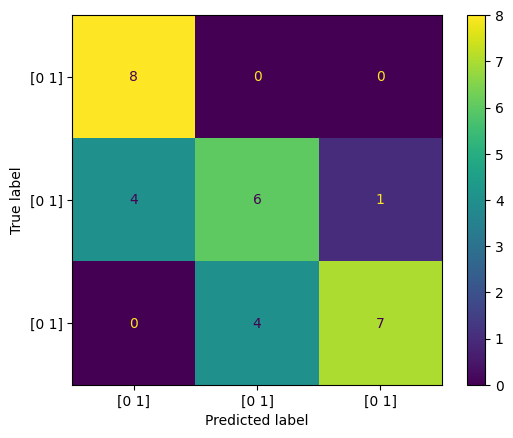

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.60      0.55      0.57        11
           2       0.92      1.00      0.96        11

   micro avg       0.83      0.83      0.83        30
   macro avg       0.84      0.85      0.84        30
weighted avg       0.82      0.83      0.83        30
 samples avg       0.77      0.83      0.79        30

Le MSE (mean square error) value is:  0.1111111111111111
Le score est:  0.7





c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 -Implementation MultiOutputClassifier(estimator=LinearSVC(C=10, max_iter=100000))
Valeur predite:
[[0 1 0]
 [0 1 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]]
Ce qui est attendu:
      Iris-setosa  Iris-versicolor  Iris-virginica
82             0                1               0
134            0                0               1
114            0                0               1
42             1                0               0
109            0                0               1
Les métriques MultiOutputClassifier(estimator=LinearSVC(C=10, max_iter=100000))
Accuracy_score  0.6666666666666666
Matice de confusion


c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


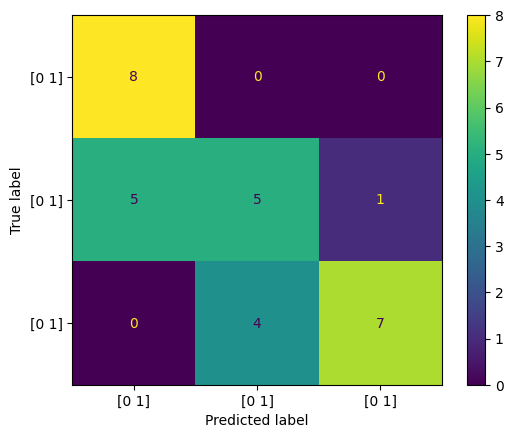

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.56      0.45      0.50        11
           2       0.91      0.91      0.91        11

   micro avg       0.82      0.77      0.79        30
   macro avg       0.82      0.79      0.80        30
weighted avg       0.80      0.77      0.78        30
 samples avg       0.72      0.77      0.73        30

Le MSE (mean square error) value is:  0.13333333333333333
Le score est:  0.6666666666666666



 -Implementation MultiOutputClassifier(estimator=SVC(C=10, gamma=0.1))
Valeur predite:
[[0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]]
Ce qui est attendu:
      Iris-setosa  Iris-versicolor  Iris-virginica
82             0                1               0
134            0                0               1
114            0                0               1
42             1                0               0
109            0                0           

c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


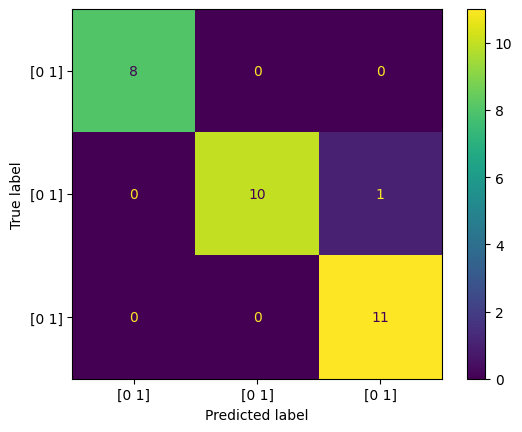

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30

Le MSE (mean square error) value is:  0.022222222222222223
Le score est:  0.9666666666666667



 -Implementation MultiOutputClassifier(estimator=SVC(C=10, gamma=0.1, kernel='poly'))
Valeur predite:
[[0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]]
Ce qui est attendu:
      Iris-setosa  Iris-versicolor  Iris-virginica
82             0                1               0
134            0                0               1
114            0                0               1
42             1                0               0
109            0            

c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


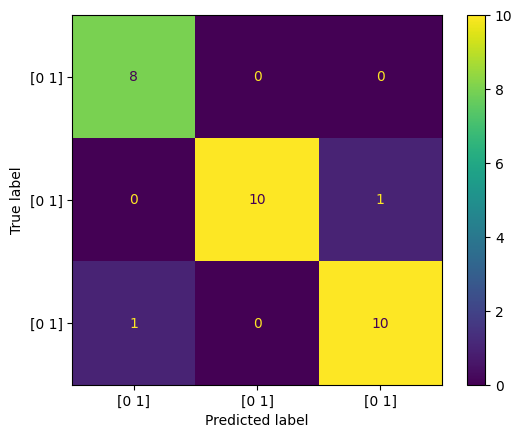

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.91      0.91      0.91        11

   micro avg       0.97      0.93      0.95        30
   macro avg       0.97      0.94      0.95        30
weighted avg       0.97      0.93      0.95        30
 samples avg       0.93      0.93      0.93        30

Le MSE (mean square error) value is:  0.03333333333333333
Le score est:  0.9333333333333333





c:\Users\Oussou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:

for clf in models:
    clf.fit(X_train, Y_train)
    yhat= clf.predict(X_test)
    print(" -Implementation", clf)
    print("Valeur predite:")
    print(yhat[:5])
    print("Ce qui est attendu:\n",Y_test[:5])

    print("Les métriques", clf)
    mse = mean_squared_error(Y_test, yhat)
    score = clf.score(X_test, Y_test)
    if(choice==1):
        acc = accuracy_score(Y_test, yhat)
        print("Accuracy_score ", acc)

        print("Matice de confusion")
        arrayList_Y_test = np.asarray(Y_test)
        arrayList_yhat = np.asarray(yhat)
        matrix =confusion_matrix(arrayList_Y_test.argmax(axis=1), arrayList_yhat.argmax(axis=1))
        # print(matrix)
        # plt.figure()
        disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=clf.classes_) 
        disp.plot()
        plt.show()
        # sns.heatmap(matrix, annot= True)

        print("classification_report")
        classification=classification_report(Y_test, yhat)
        print(classification)

    print('Le MSE (mean square error) value is: ', mse)
    print("Le score est: ", score)
    print("\n\n")

## Le code ci-dessous ne concerne pas ni les multi-output, ni les multi-class, ni les multilabel, or on est dans un cas Multiclass
Elle fut utilisé dans le cas simple de svm oùu on avait utilisé le dataset **iris** intégré  dans la biblithèque. Remarque: celui-ci a étiquetté le output par les classe 0, 1, 2. Ces derniers étaient ainsi utilisés pour la prediction (chose non recommandé), d'où l'objet de la **veille6 étendue en appliquant le onehot**  à savoir, appliquer le one-hot

In [22]:
# # Regler la grille des graphe à 2x2  
# fig, sub = plt.subplots(2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

# X0, X1 = X[:, 0], X[:, 1]

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X, # X doit être de dimension 2
#         response_method="predict",
#         cmap=plt.cm.coolwarm,
#         alpha=0.8,
#         ax=ax,
#         xlabel=iris.feature_names[0],
#         ylabel=iris.feature_names[1],
#     )
#     ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)

# plt.show()